In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

from utils import summarize_df, plot_signals_p_value, plot_signals_auc, plot_signals_gini, plot_conf_int, plot_correction
from statsmodels.stats.multitest import multipletests

In [2]:
infections = pd.read_csv('epi_data_age_gender.csv')
inf_idxs = list(infections[(infections.Group != 'HC') & (infections.Infection == 'Yes')].ID)
uninf_idxs = list(infections[(infections.Group != 'HC') & (infections.Infection != 'Yes')].ID)
data = pd.read_excel('S1File.xlsx', sheet_name = 'CFS_JPT_Seroarray')
data = data.iloc[1254:1270]
data = data[list(data.columns[:8])+inf_idxs+uninf_idxs]

# Signals

In [3]:
smr, all_lower_bounds, all_p_values, auc, gini = summarize_df(data, 8, 62)

**Chi-squared**

In [4]:
smr_p_value = smr[['name', 'min_p_value', 'test_lower_bound', 'test_upper_bound']]
smr_p_value.columns = ['ID', 'minimum p-value', 'lower bound', 'upper bound']
smr_p_value.iloc[:, 2:] = np.round(smr_p_value.iloc[:, 2:], 3)
smr_p_value

,ID,minimum p-value,lower bound,upper bound
0,EBNA1_0415 (AG876),0.079924,980.000,997.667
1,EBNA1_0415 (B95-8),0.227018,1229.667,1230.000
2,EBNA1_0419 (AG876),0.081105,2967.333,3046.000
3,"EBNA1_0419 (B95-8, GD1)",0.109330,1898.000,2248.333
4,EBNA1_0423 (AG876),0.041255,1080.500,1106.333
5,"EBNA1_0423 (B95-8, GD1)",0.012535,1197.000,1197.333
6,EBNA1_0427 (GD1),0.229515,1291.000,1311.000
7,"EBNA1_0430 (AG876, B95-8)",0.063476,1962.333,2028.667
8,EBNA1_0431 (GD1),0.568534,1060.667,1068.000
9,"EBNA1_0434 (AG876, B95-8)",0.311348,930.333,930.333


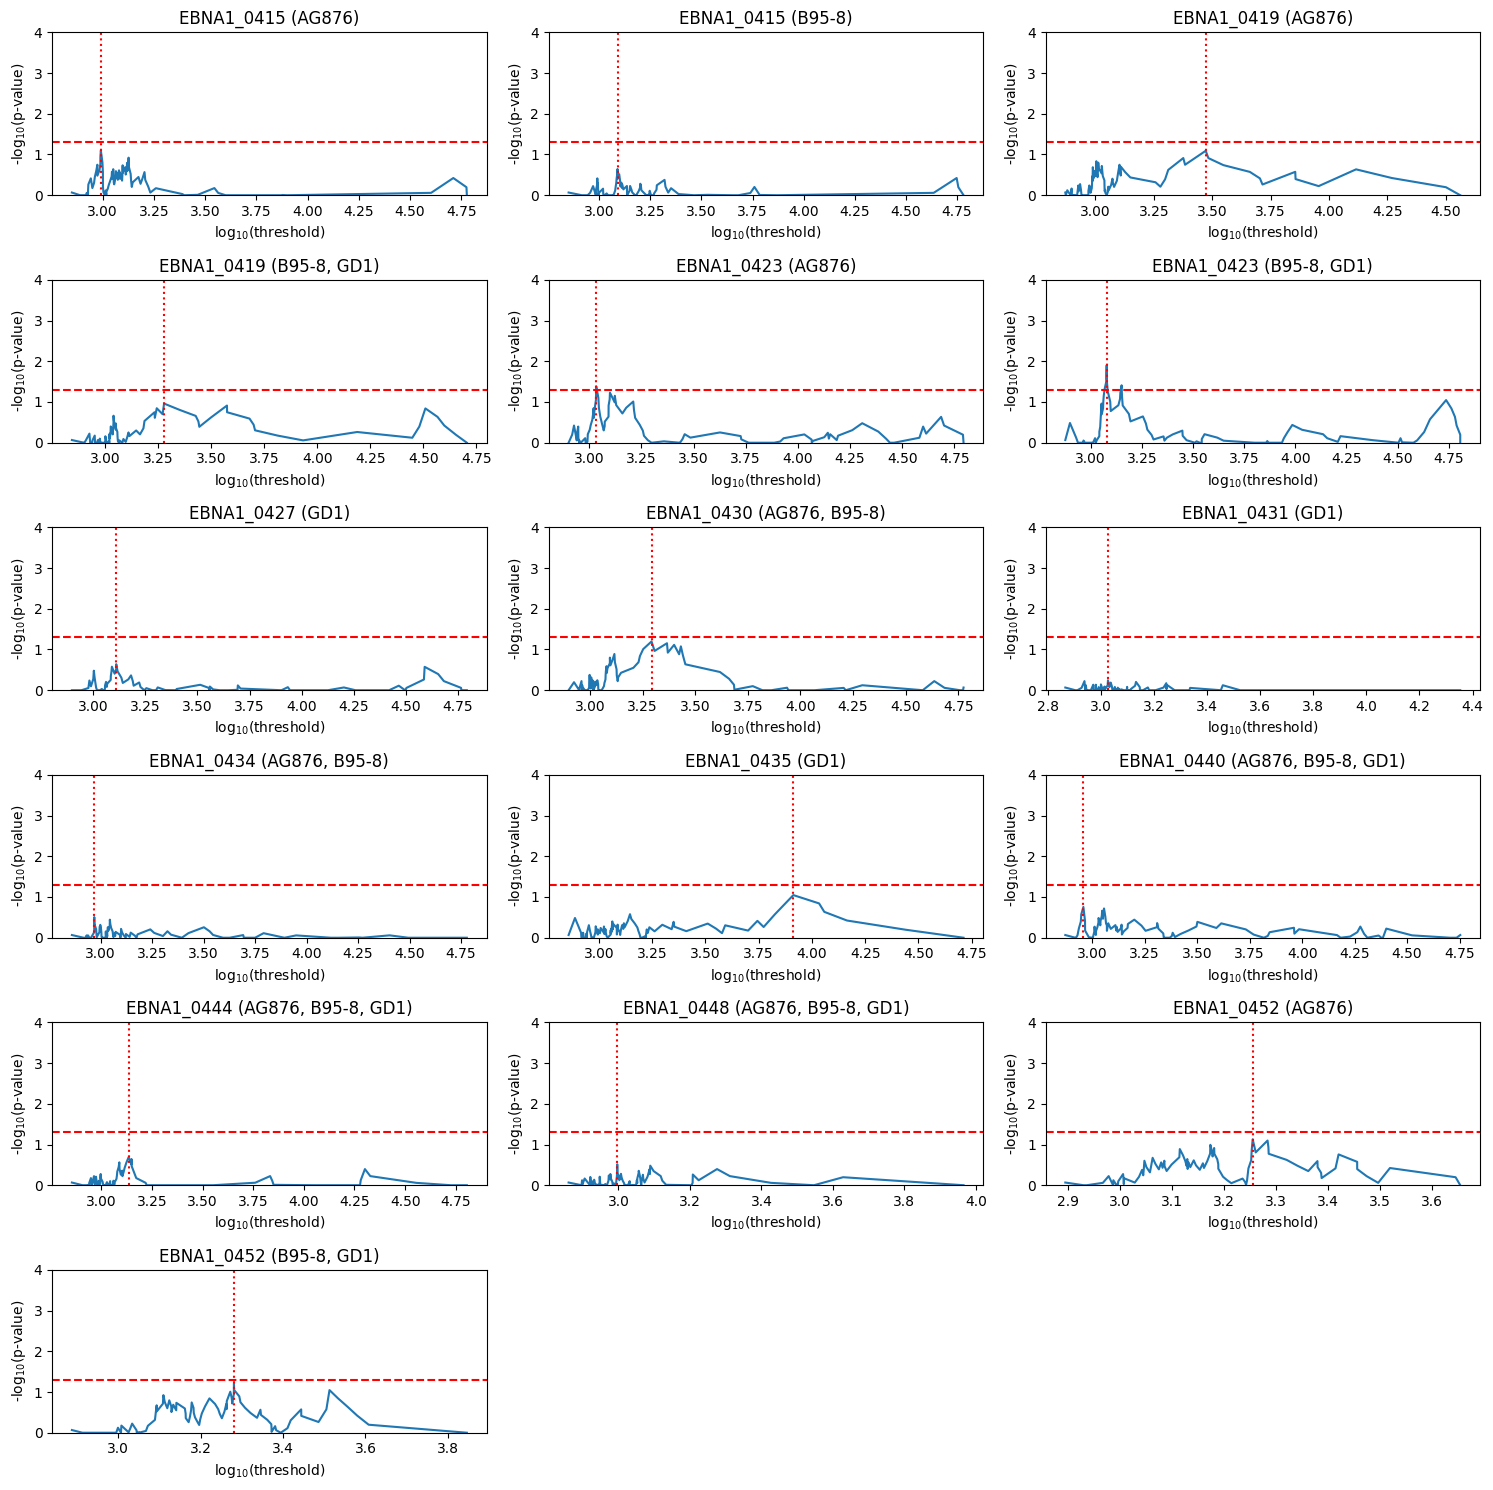

In [5]:
plot_signals_p_value(smr, all_lower_bounds, all_p_values)

**AUC**

In [6]:
smr_auc = smr[['name', 'max_auc', 'auc_lower_bound', 'auc_upper_bound']]
smr_auc.columns = ['ID', 'maximum AUC', 'lower bound', 'upper bound']
smr_auc.iloc[:, 2:] = np.round(smr_auc.iloc[:, 2:], 3)
smr_auc

,ID,maximum AUC,lower bound,upper bound
0,EBNA1_0415 (AG876),0.586257,980.000,997.667
1,EBNA1_0415 (B95-8),0.572125,1229.667,1230.000
2,EBNA1_0419 (AG876),0.587232,1009.667,1012.000
3,"EBNA1_0419 (B95-8, GD1)",0.582359,1898.000,2248.333
4,EBNA1_0423 (AG876),0.611598,1080.500,1106.333
5,"EBNA1_0423 (B95-8, GD1)",0.634016,1197.000,1197.333
6,EBNA1_0427 (GD1),0.573587,1291.000,1311.000
7,"EBNA1_0430 (AG876, B95-8)",0.603314,1962.333,2028.667
8,EBNA1_0431 (GD1),0.539961,1060.667,1068.000
9,"EBNA1_0434 (AG876, B95-8)",0.559454,1107.333,1113.000


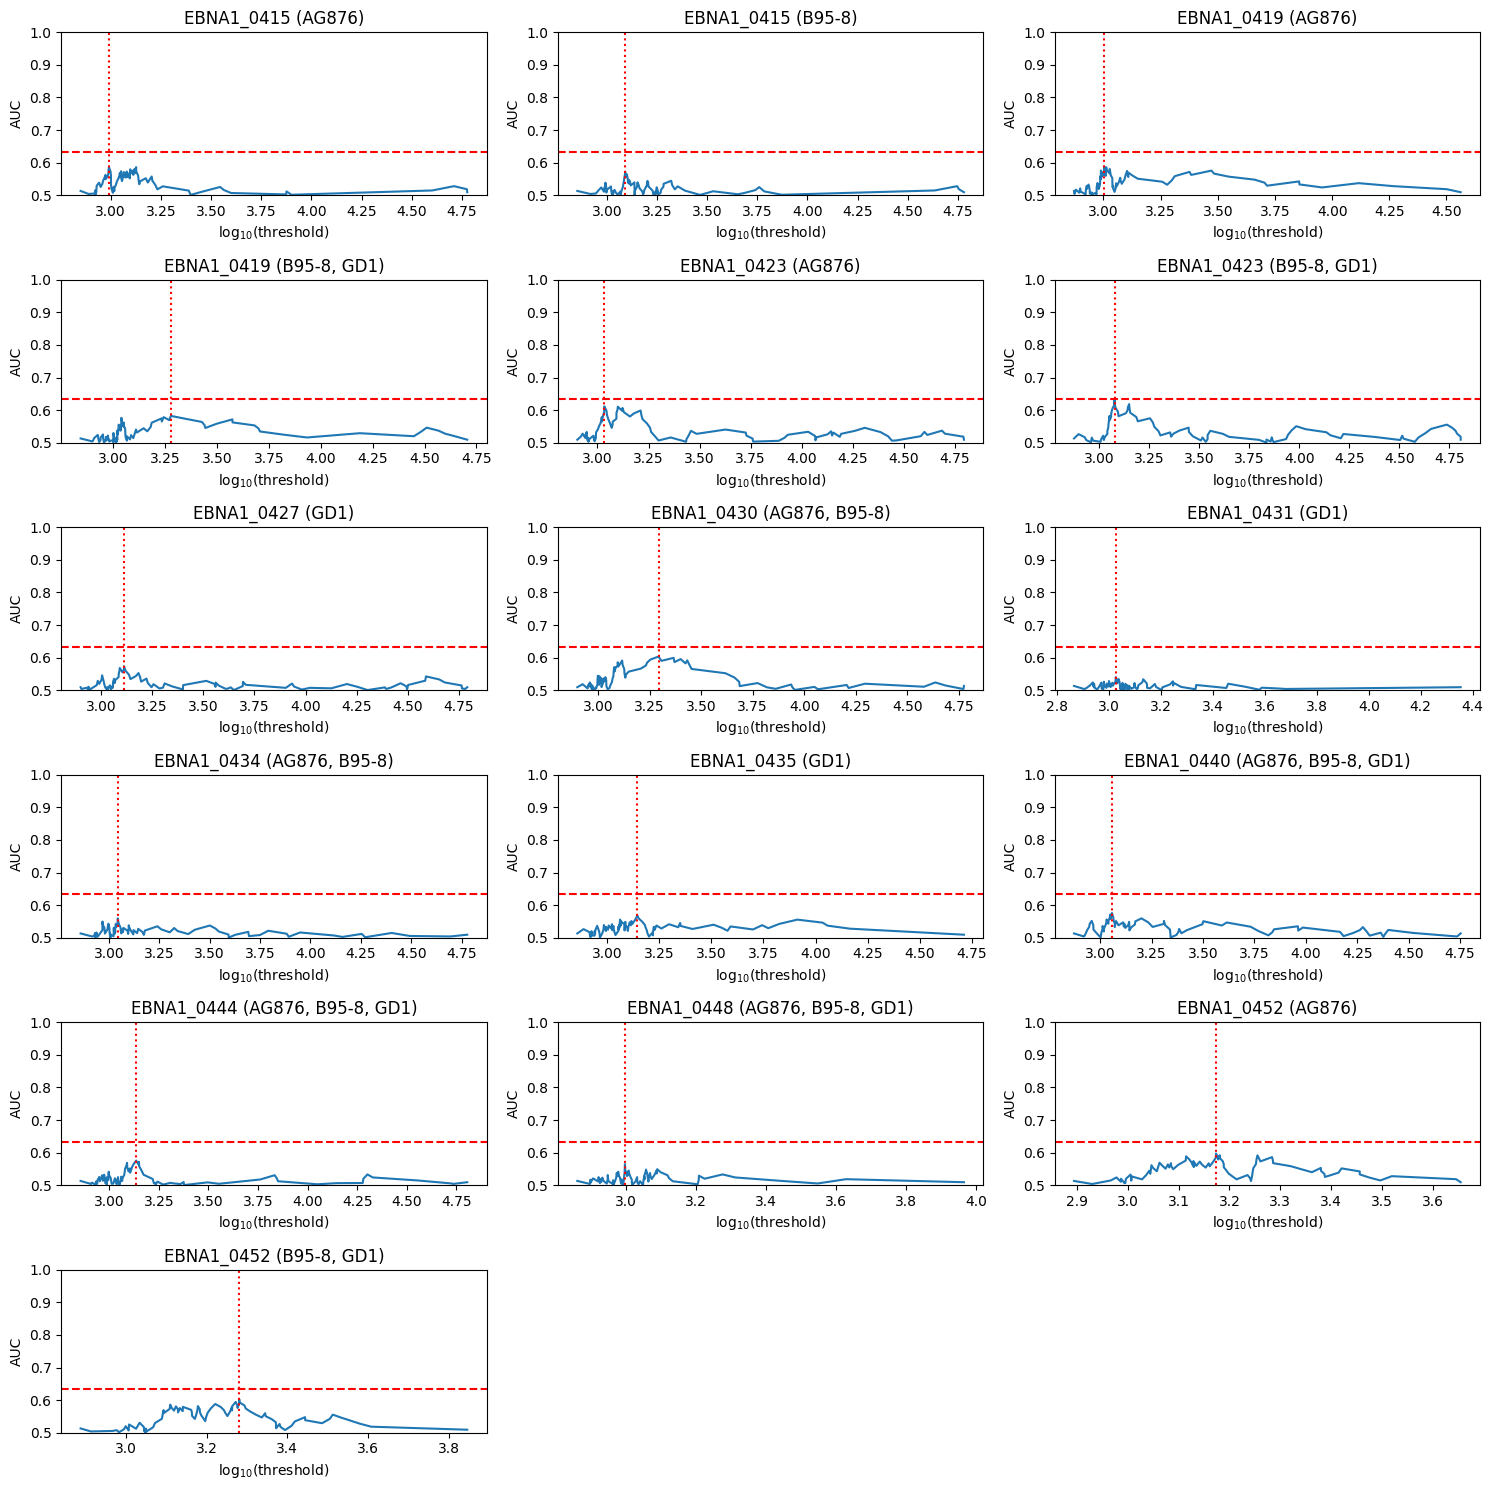

In [7]:
plot_signals_auc(smr, all_lower_bounds, auc)

**Gini decrease**

In [8]:
smr_gini = smr[['name', 'max_gini', 'gini_lower_bound', 'gini_upper_bound']]
smr_gini.columns = ['ID', 'maximum Gini decrease', 'lower bound', 'upper bound']
smr_gini.iloc[:, 2:] = np.round(smr_gini.iloc[:, 2:], 3)
smr_gini

,ID,maximum Gini decrease,lower bound,upper bound
0,EBNA1_0415 (AG876),0.021349,980.000,997.667
1,EBNA1_0415 (B95-8),0.011501,55931.333,57016.000
2,EBNA1_0419 (AG876),0.022111,2967.333,3046.000
3,"EBNA1_0419 (B95-8, GD1)",0.019610,32383.000,36929.333
4,EBNA1_0423 (AG876),0.027130,1080.500,1106.333
5,"EBNA1_0423 (B95-8, GD1)",0.039124,1197.000,1197.333
6,EBNA1_0427 (GD1),0.012024,38894.000,45160.333
7,"EBNA1_0430 (AG876, B95-8)",0.022839,1962.333,2028.667
8,EBNA1_0431 (GD1),0.007572,732.333,799.333
9,"EBNA1_0434 (AG876, B95-8)",0.009005,930.333,930.333


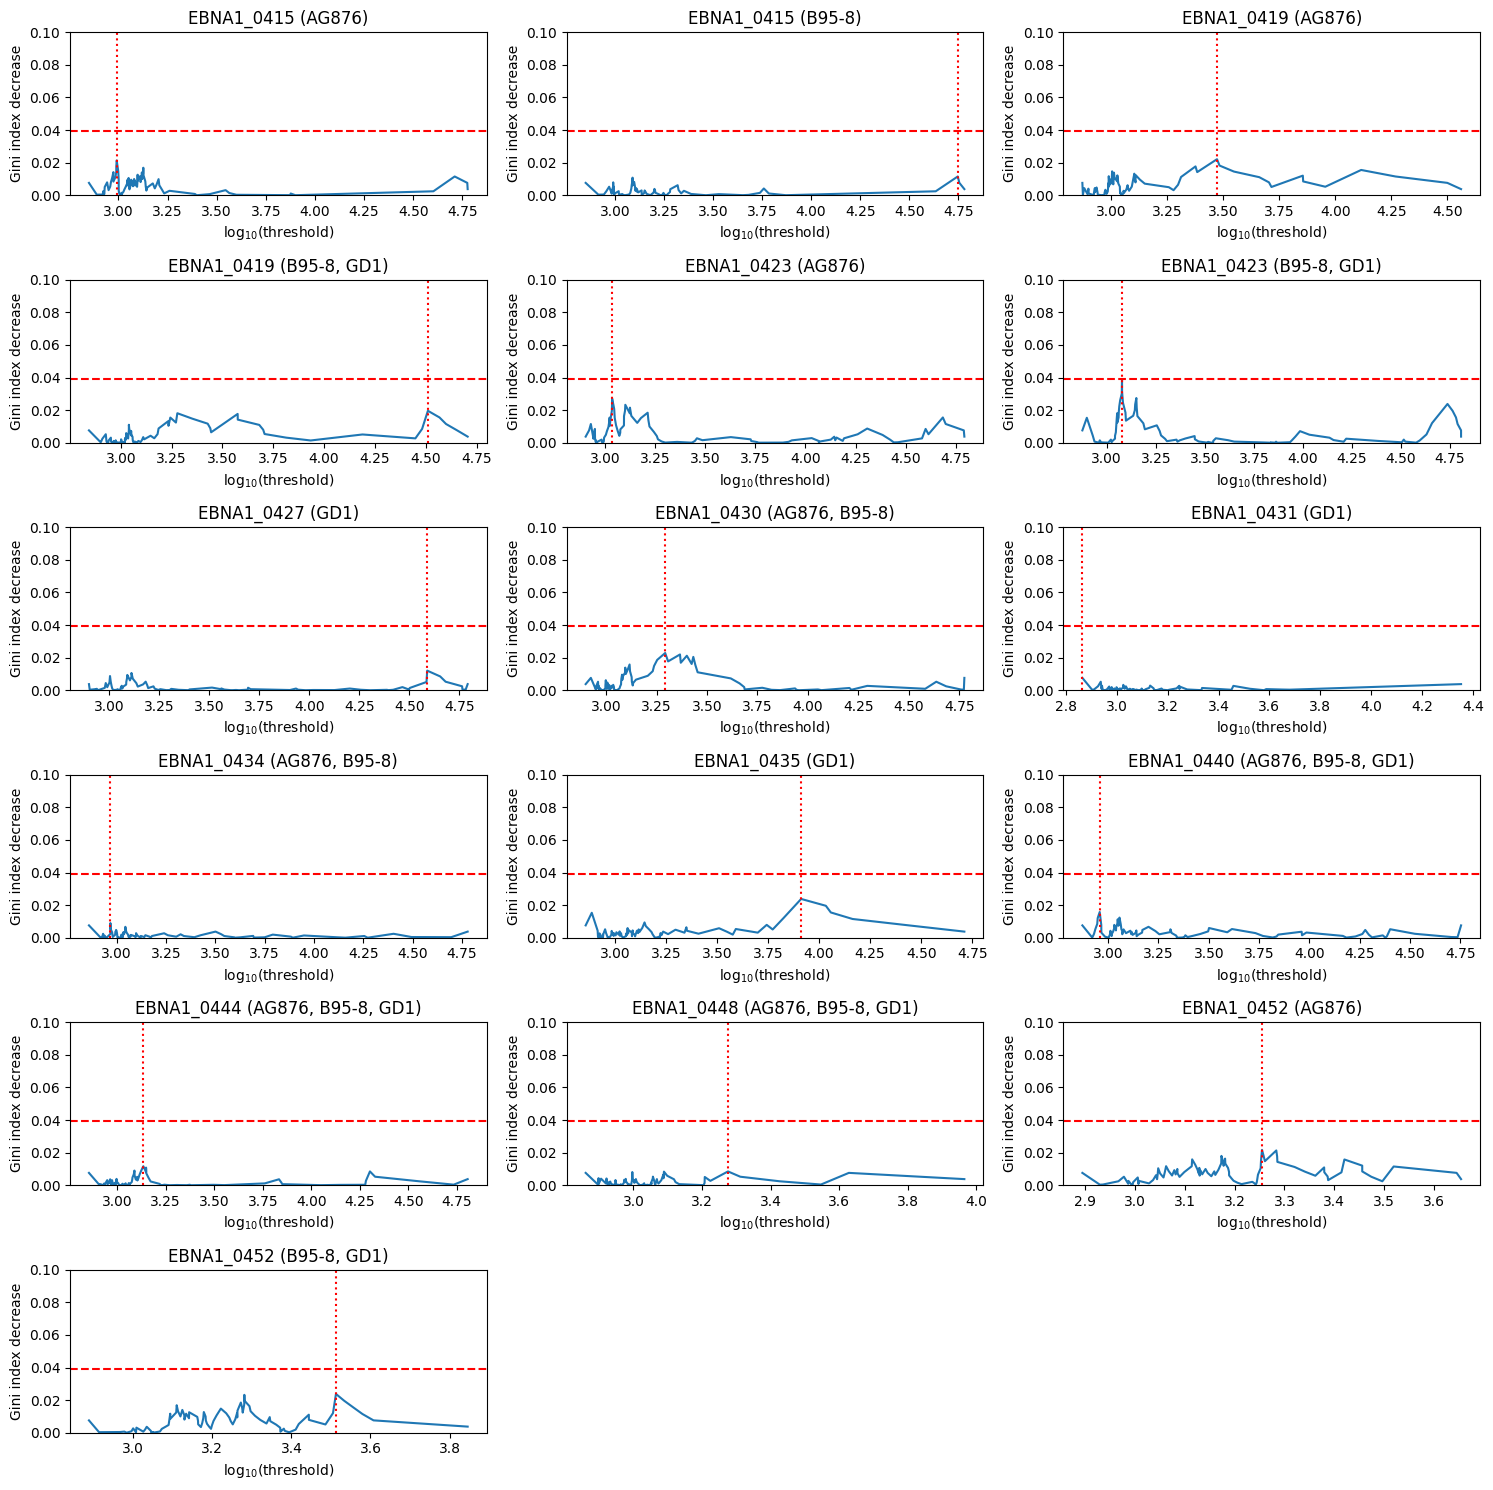

In [9]:
plot_signals_gini(smr, all_lower_bounds, gini)

**Summary of thresholds**

In [10]:
thr_p_value = np.round(smr.test_lower_bound, 2).astype(str) + ' - ' + np.round(smr.test_upper_bound, 2).astype(str)
thr_auc = np.round(smr.auc_lower_bound, 2).astype(str) + ' - ' + np.round(smr.auc_upper_bound, 2).astype(str)
thr_gini = np.round(smr.gini_lower_bound, 2).astype(str) + ' - ' + np.round(smr.gini_upper_bound, 2).astype(str)
pd.DataFrame({'ID': smr.name, 'Chi-squared': thr_p_value, 'AUC': thr_auc, 'Gini': thr_gini})

,ID,Chi-squared,AUC,Gini
0,EBNA1_0415 (AG876),980.0 - 997.67,980.0 - 997.67,980.0 - 997.67
1,EBNA1_0415 (B95-8),1229.67 - 1230.0,1229.67 - 1230.0,55931.33 - 57016.0
2,EBNA1_0419 (AG876),2967.33 - 3046.0,1009.67 - 1012.0,2967.33 - 3046.0
3,"EBNA1_0419 (B95-8, GD1)",1898.0 - 2248.33,1898.0 - 2248.33,32383.0 - 36929.33
4,EBNA1_0423 (AG876),1080.5 - 1106.33,1080.5 - 1106.33,1080.5 - 1106.33
5,"EBNA1_0423 (B95-8, GD1)",1197.0 - 1197.33,1197.0 - 1197.33,1197.0 - 1197.33
6,EBNA1_0427 (GD1),1291.0 - 1311.0,1291.0 - 1311.0,38894.0 - 45160.33
7,"EBNA1_0430 (AG876, B95-8)",1962.33 - 2028.67,1962.33 - 2028.67,1962.33 - 2028.67
8,EBNA1_0431 (GD1),1060.67 - 1068.0,1060.67 - 1068.0,732.33 - 799.33
9,"EBNA1_0434 (AG876, B95-8)",930.33 - 930.33,1107.33 - 1113.0,930.33 - 930.33


# Confidence intervals

In [11]:
smr_copy = smr[['name', 'proportion_min_g1', 'test_g1_prop_above', 'proportion_max_g1', 'proportion_min_g2', 'test_g2_prop_above', 'proportion_max_g2']]
smr_copy.columns = ['ID', 'infected CFS (min)', 'infected CFS (mean)', 'infected CFS (max)', 'uninfected CFS (min)', 'uninfected CFS (mean)', 'uninfected CFS (max)']
smr_copy.iloc[:, 1:] = np.round(smr_copy.iloc[:, 1:], 2)
smr_copy

,ID,infected CFS (min),infected CFS (mean),infected CFS (max),uninfected CFS (min),uninfected CFS (mean),uninfected CFS (max)
0,EBNA1_0415 (AG876),0.60,0.72,0.84,0.80,0.89,0.99
1,EBNA1_0415 (B95-8),0.46,0.59,0.72,0.60,0.74,0.88
2,EBNA1_0419 (AG876),0.10,0.20,0.31,0.00,0.05,0.12
3,"EBNA1_0419 (B95-8, GD1)",0.17,0.30,0.42,0.02,0.13,0.24
4,EBNA1_0423 (AG876),0.46,0.59,0.72,0.69,0.82,0.94
5,"EBNA1_0423 (B95-8, GD1)",0.44,0.57,0.71,0.73,0.84,0.96
6,EBNA1_0427 (GD1),0.40,0.54,0.67,0.54,0.68,0.83
7,"EBNA1_0430 (AG876, B95-8)",0.13,0.24,0.35,0.29,0.45,0.61
8,EBNA1_0431 (GD1),0.56,0.69,0.81,0.45,0.61,0.76
9,"EBNA1_0434 (AG876, B95-8)",0.81,0.89,0.97,0.66,0.79,0.92


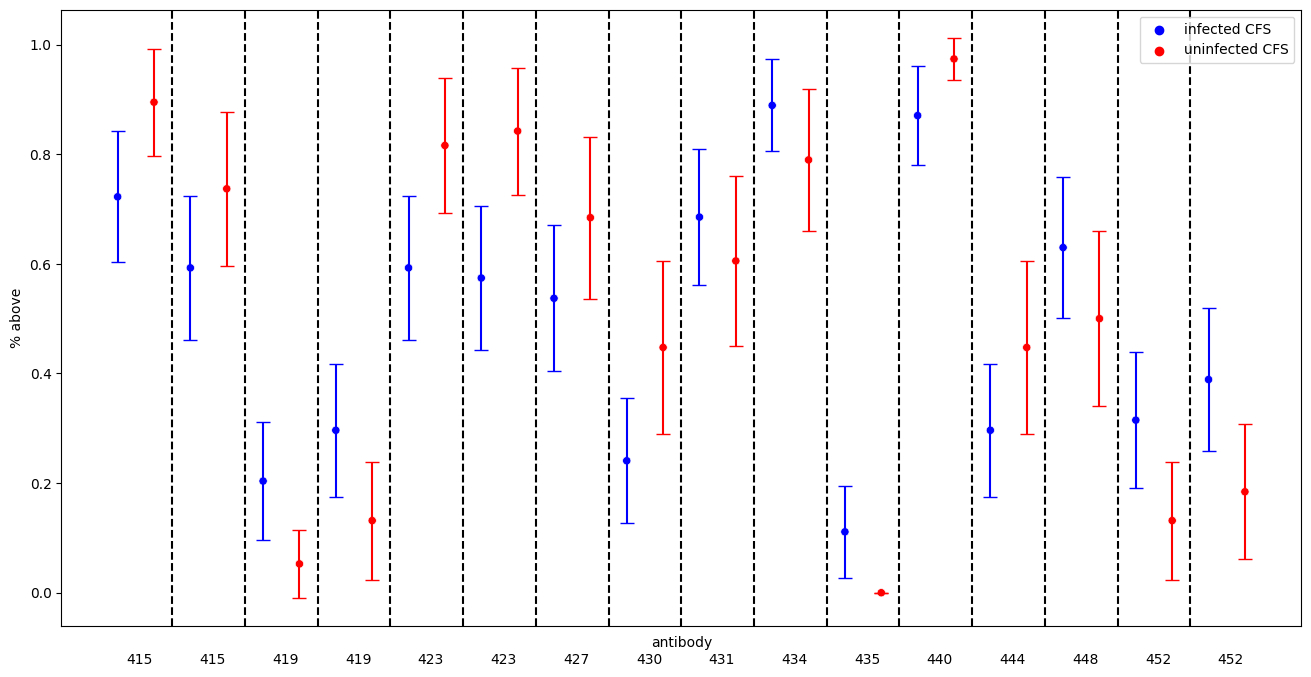

In [12]:
plot_conf_int(smr, 'infected CFS', 'uninfected CFS')

# Multiple testing correction

In [13]:
ag876 = 'FEYHQEGGPDGEPDMPPGAIEQGPADDPGEGPSTGPRGQGDGGRRKKGGWYG'
ag876_stop = [15, 19, 23, 30, 34, 40, 44, 48, 52]
ag876_target = 16
b958 = 'FEYHQEGGPDGEPDVPPGAIEQGPADDPGEGPSTGPRGQGDGGRRKKGGWFG'
b958_stop = [15, 19, 23, 30, 34, 40, 44, 48, 52]
b958_target = 16
gd1 = 'QEGGPDGEPDVPPGAIEQGPTDDPGEGPSTGPRGQGDGGRRKKGGWFG'
gd1_stop = [15, 19, 23, 27, 31, 36, 40, 44, 48]
gd1_target = 12

In [14]:
adj_p_values_bonf = -np.log10(multipletests(np.array(smr['min_p_value']), method = 'bonferroni')[1])
adj_p_values_bh = -np.log10(multipletests(np.array(smr['min_p_value']), method = 'fdr_bh')[1])
adj_p_values_by = -np.log10(multipletests(np.array(smr['min_p_value']), method = 'fdr_by')[1])
adj_p_values_bky = -np.log10(multipletests(np.array(smr['min_p_value']), method = 'fdr_tsbky')[1])

In [15]:
adj_p_values = [adj_p_values_bonf, adj_p_values_bh, adj_p_values_by, adj_p_values_bky]
correction_types = ['Bonferroni' ,'Benjamini-Hochberg', 'Benjamini-Yekutieli', '2-stage Benjamini-Krieger-Yekutieli']
strains = ['AG876', 'B95-8', 'GD1']
strain_seqs = [ag876, b958, gd1]
strain_stops = [ag876_stop, b958_stop, gd1_stop]
strain_targets = [ag876_target, b958_target, gd1_target]

In [16]:
pvals = np.round(pd.DataFrame({k:v for k,v in zip(correction_types, adj_p_values)}), 3)
pvals.insert(0, 'ID', smr.name)
pvals

,ID,Bonferroni,Benjamini-Hochberg,Benjamini-Yekutieli,2-stage Benjamini-Krieger-Yekutieli
0,EBNA1_0415 (AG876),-0.000,0.746,0.217,0.725
1,EBNA1_0415 (B95-8),-0.000,0.549,0.020,0.528
2,EBNA1_0419 (AG876),-0.000,0.746,0.217,0.725
3,"EBNA1_0419 (B95-8, GD1)",-0.000,0.711,0.182,0.690
4,EBNA1_0423 (AG876),0.180,0.746,0.217,0.725
5,"EBNA1_0423 (B95-8, GD1)",0.698,0.746,0.217,0.725
6,EBNA1_0427 (GD1),-0.000,0.549,0.020,0.528
7,"EBNA1_0430 (AG876, B95-8)",-0.000,0.746,0.217,0.725
8,EBNA1_0431 (GD1),-0.000,0.245,-0.000,0.224
9,"EBNA1_0434 (AG876, B95-8)",-0.000,0.479,-0.000,0.458


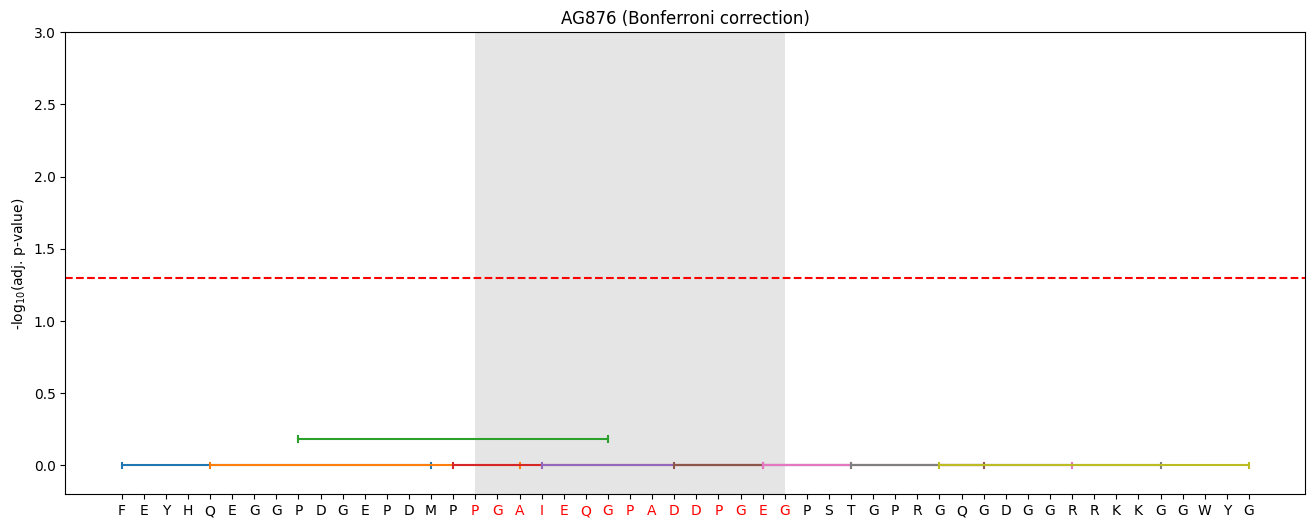

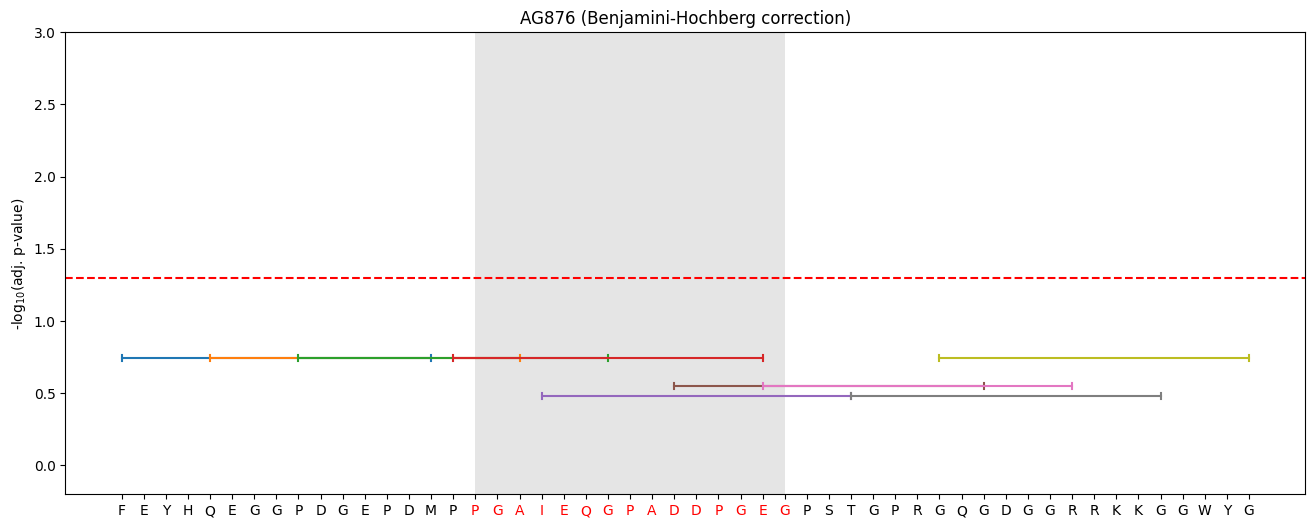

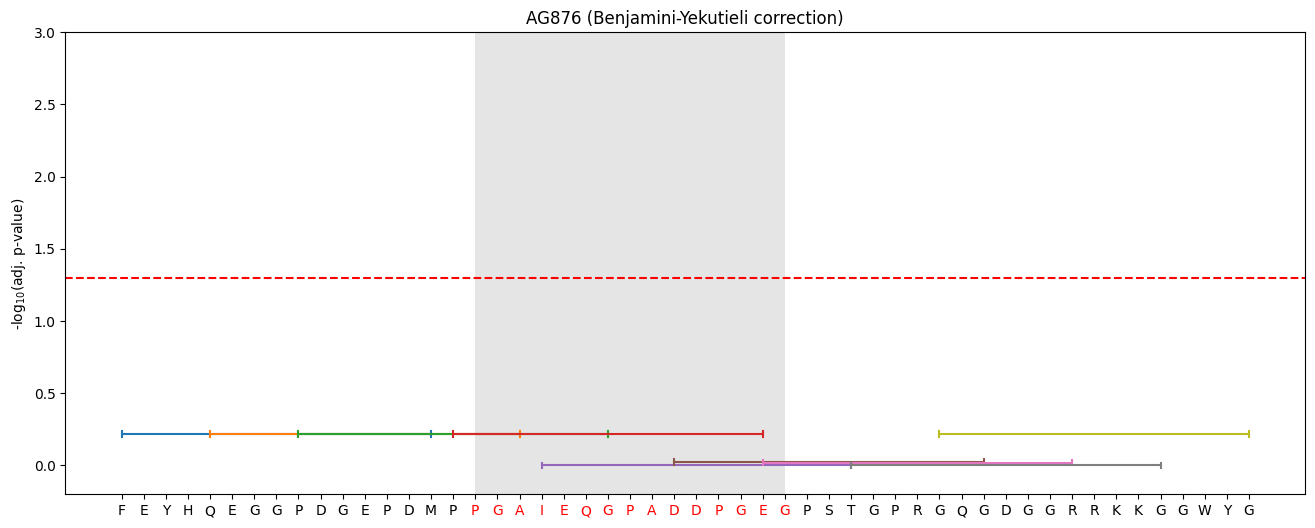

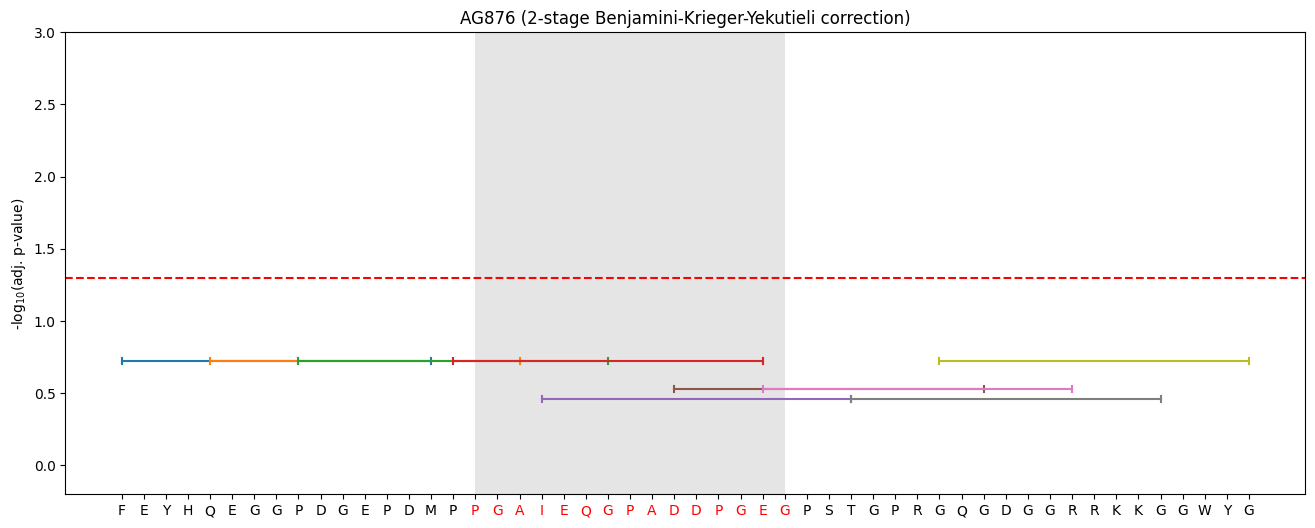

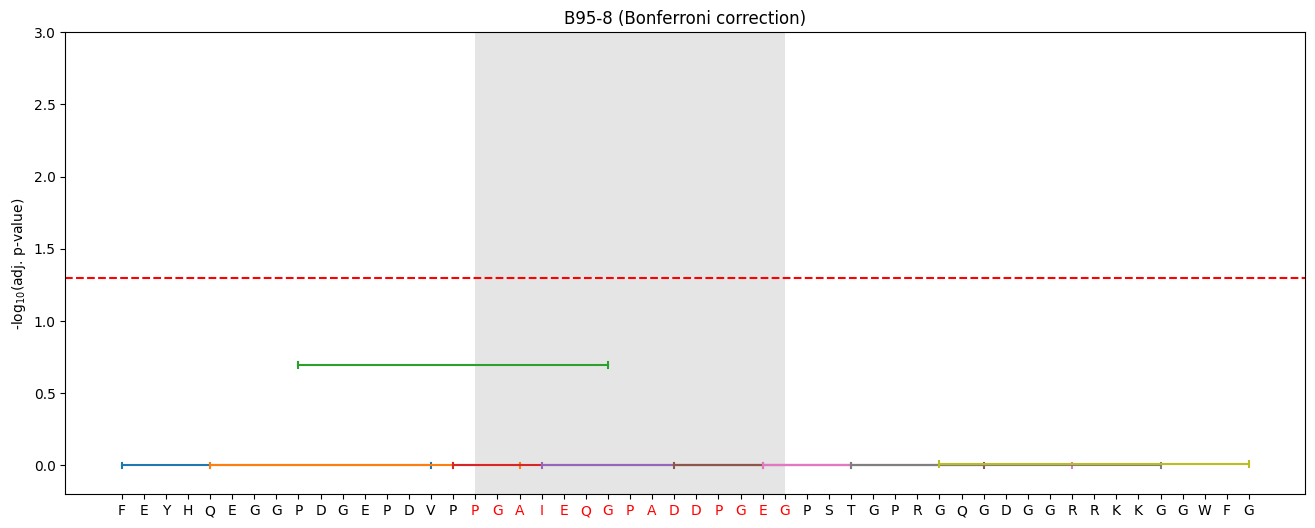

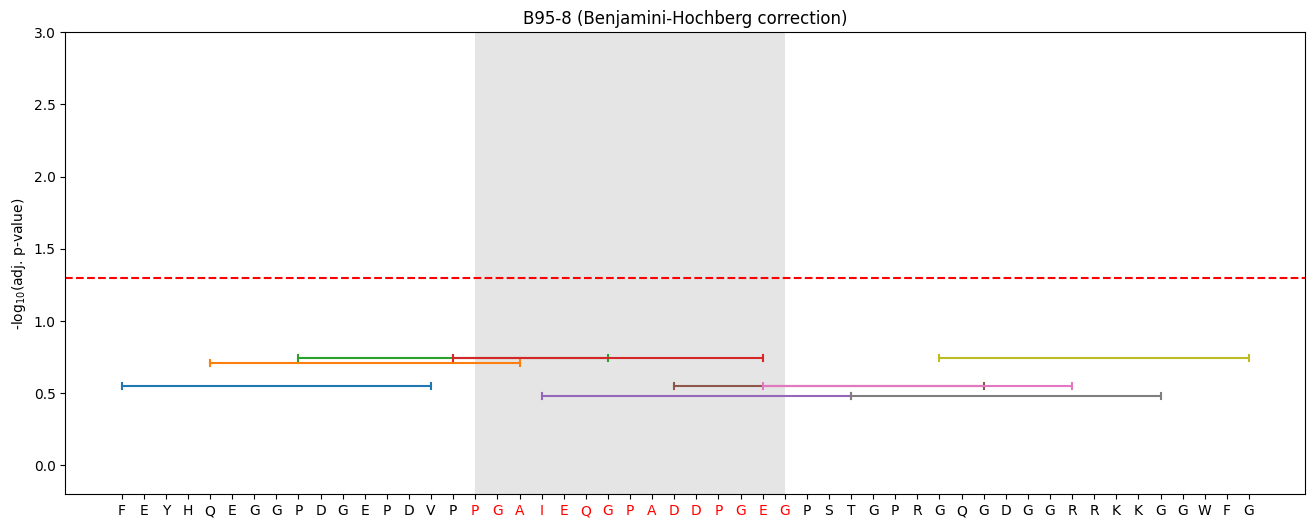

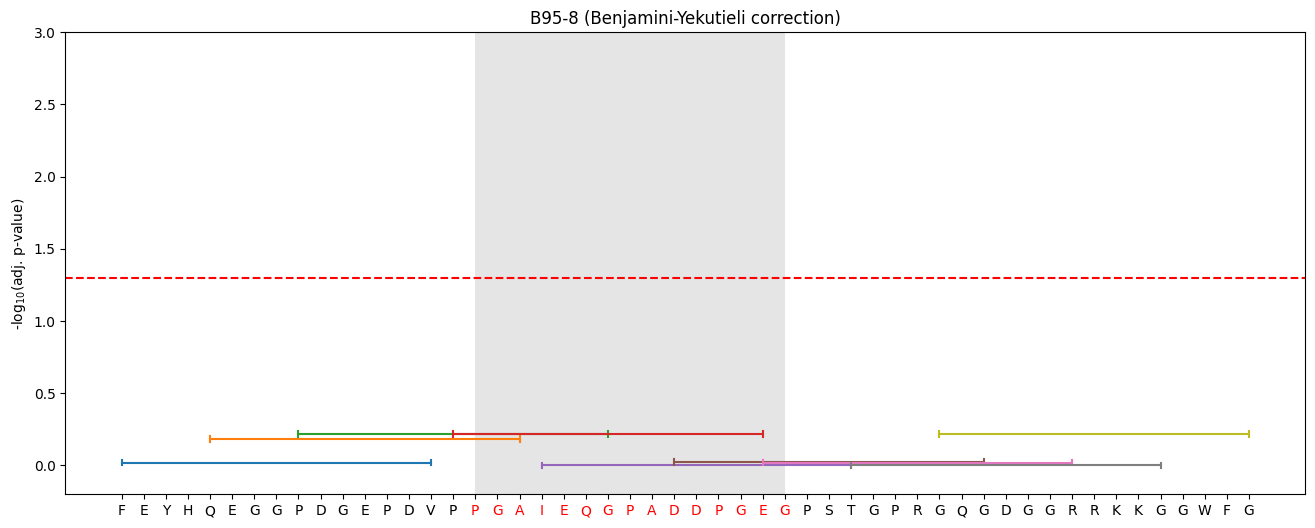

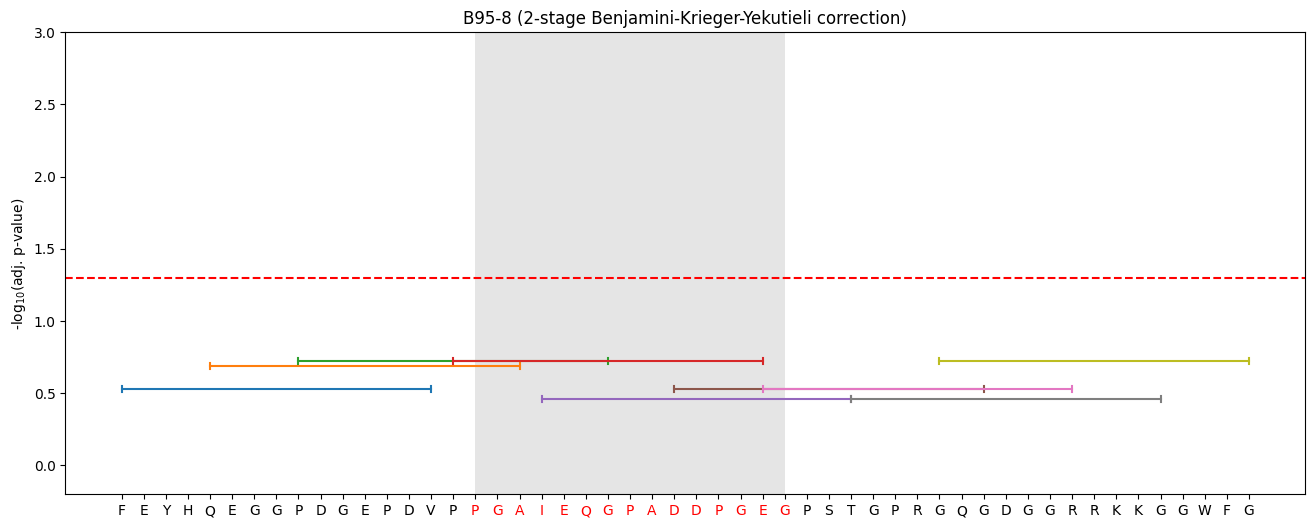

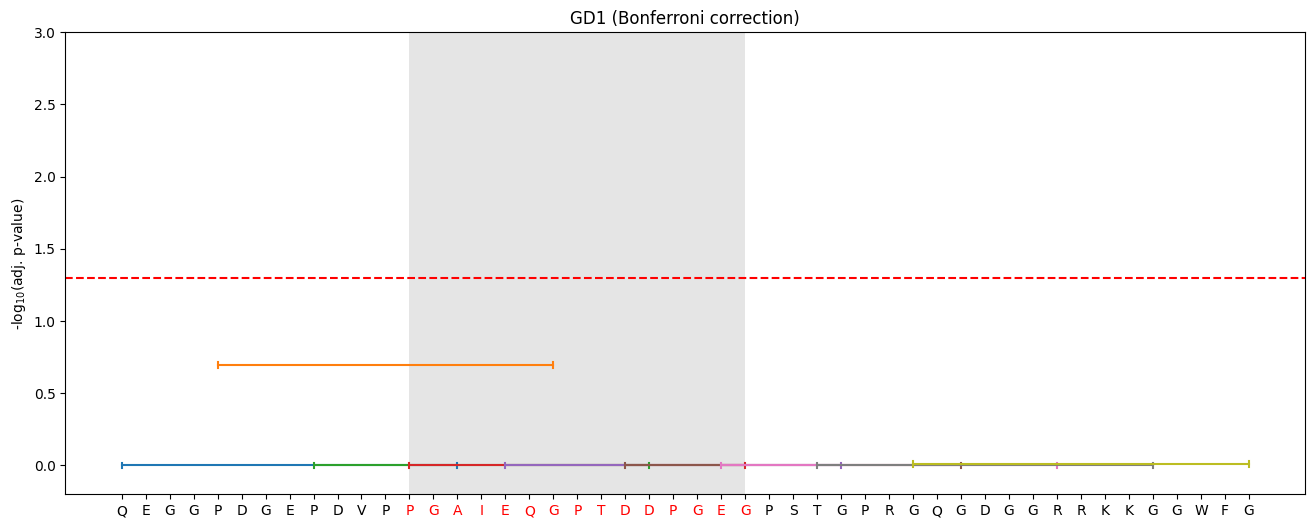

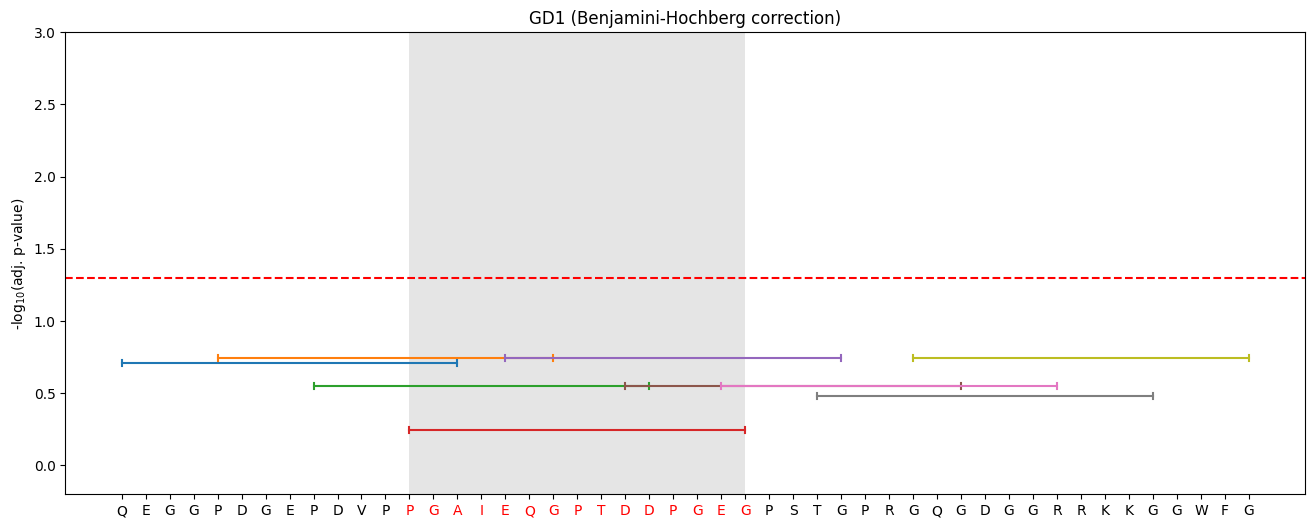

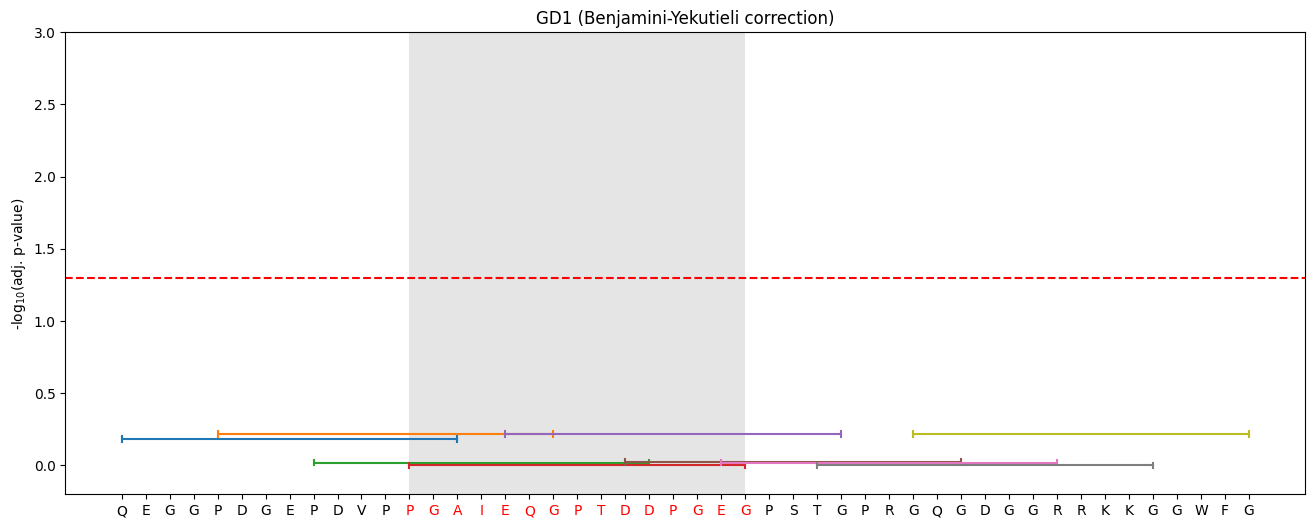

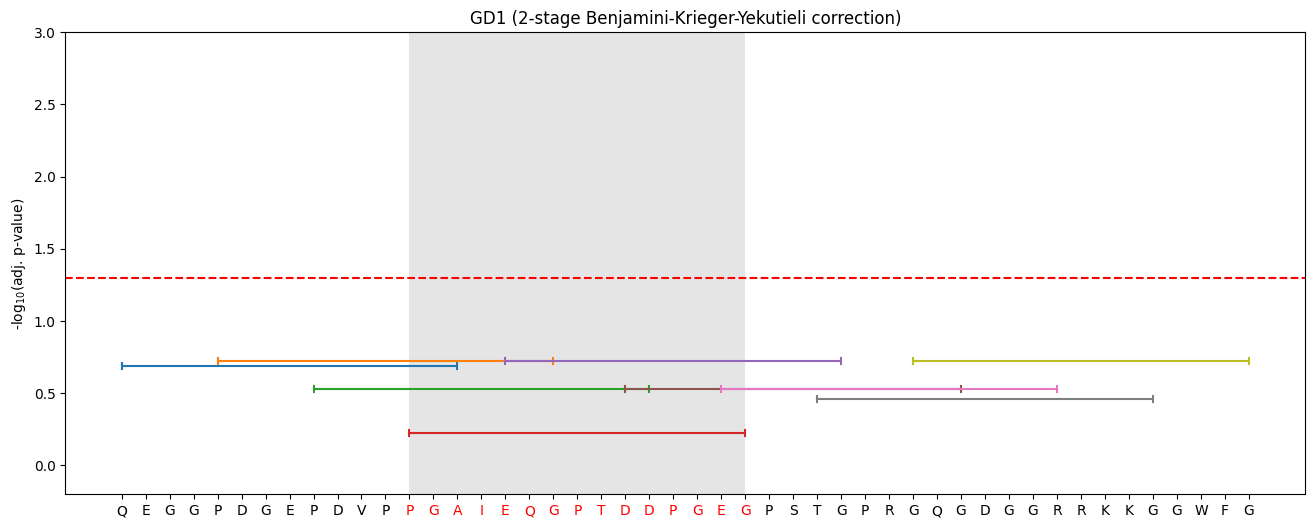

In [17]:
for j in range(len(strains)):
    for i in range(len(correction_types)):
        plot_correction(smr.groups, adj_p_values[i], correction_types[i], strains[j], strain_seqs[j], strain_stops[j], strain_targets[j])